In [28]:
import pandas
from matplotlib import pyplot
from sklearn.metrics import r2_score, accuracy_score, precision_score
from sklearn.model_selection import train_test_split 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [ ]:
originalDataset = pandas.read_csv("osu_dataset.csv")
dataset = originalDataset.dropna()

originalX = originalDataset[dataset.columns.difference(["isAimMap"])]
X = dataset[dataset.columns.difference(["isAimMap"])]

target = dataset["isAimMap"]
originalTarget = None
originalDataset.describe()

,aimValue,speedValue,isAimMap
count,942.000000,942.000000,942.000000
mean,5.120370,3.408062,0.977707
std,0.614822,0.437296,0.147713
min,2.910320,2.394110,0.000000
25%,4.690545,3.127875,1.000000
50%,4.999880,3.344330,1.000000
75%,5.494830,3.613797,1.000000
max,7.342590,6.437510,1.000000


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=0)

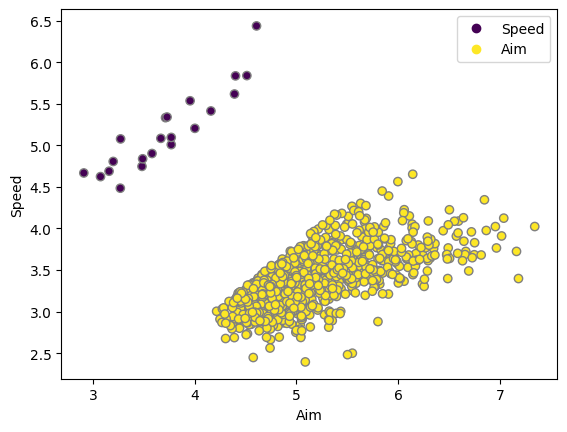

In [31]:
fig, ax = pyplot.subplots()
scatter = ax.scatter(dataset['aimValue'], dataset['speedValue'], c=dataset['isAimMap'], edgecolors='gray')
ax.legend(handles=scatter.legend_elements()[0], labels=["Speed", "Aim"])
pyplot.xlabel("Aim")
pyplot.ylabel("Speed")
pyplot.show()

In [32]:
def show_scores(Y_test, Y_predicted):
    print("Accuracy:", accuracy_score(Y_test, Y_predicted))
    print("R2:", r2_score(Y_test, Y_predicted))
    print("Precision:", precision_score(Y_test, Y_predicted))

def show_plot(dataset):
    _, ax = pyplot.subplots()
    scatter = ax.scatter(dataset['aimValue'], dataset['speedValue'], c=dataset['isAimMap'], edgecolors='gray')
    ax.legend(handles=scatter.legend_elements()[0], labels=["Speed", "Aim"])
    pyplot.xlabel("Aim")
    pyplot.ylabel("Speed")
    pyplot.show()

def handle_classifier(classifier):
    classifier.fit(X_train, Y_train)

    Y_predicted = classifier.predict(X_test)
    originalY_predicted = classifier.predict(originalX)
    originalDataset["isAimMap"] = originalY_predicted
    show_plot(originalDataset)
    show_scores(Y_test, Y_predicted)

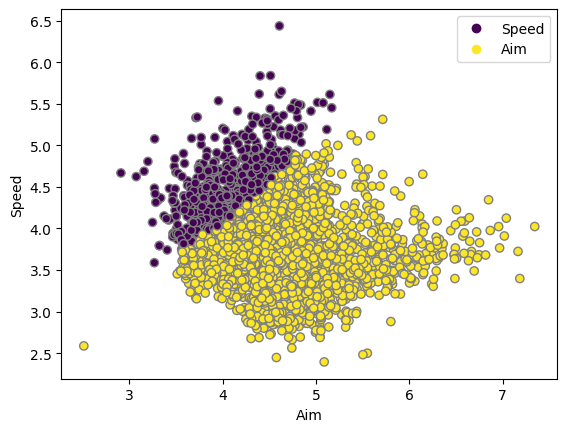

Accuracy: 1.0
R2: 1.0
Precision: 1.0


In [33]:
classifier = KNeighborsClassifier()
handle_classifier(classifier)
originalTarget = classifier.predict(originalX)
originalX_train, originalX_test, originalY_train, originalY_test = train_test_split(originalX, originalTarget, test_size=0.2, random_state=0)

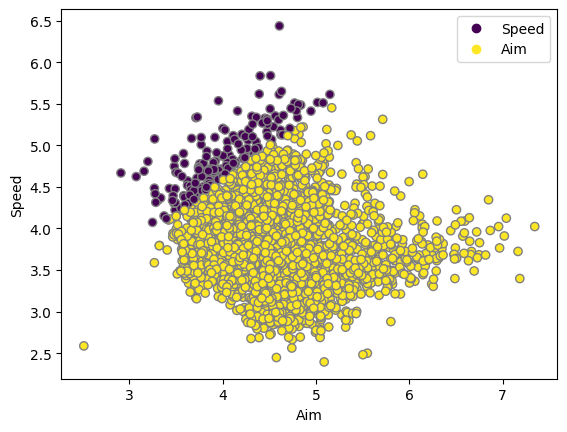

Accuracy: 1.0
R2: 1.0
Precision: 1.0

Compared with KNN:
Accuracy: 0.8582202111613876
R2: 0.10056285178236413
Precision: 0.8500797448165869


In [34]:
classifier = LogisticRegression()
handle_classifier(classifier)
print("\nCompared with KNN:")
show_scores(originalY_test, classifier.predict(originalX_test))

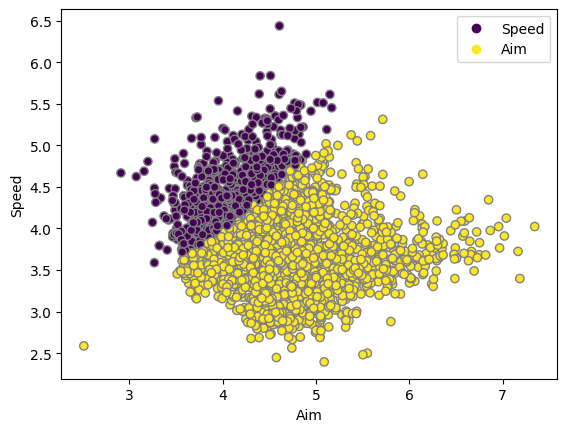

Accuracy: 1.0
R2: 1.0
Precision: 1.0

Compared with KNN:
Accuracy: 0.9592760180995475
R2: 0.7416510318949343
Precision: 1.0


In [35]:
classifier = SVC(tol=0.00001)
handle_classifier(classifier)
print("\nCompared with KNN:")
show_scores(originalY_test, classifier.predict(originalX_test))

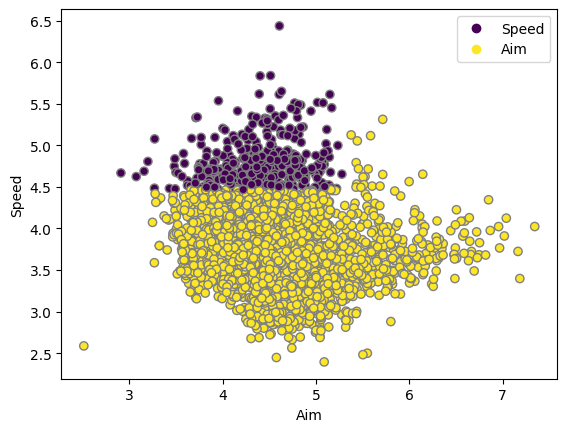

Accuracy: 1.0
R2: 1.0
Precision: 1.0

Compared with KNN:
Accuracy: 0.8853695324283559
R2: 0.27279549718574125
Precision: 0.8919382504288165


In [36]:
classifier = DecisionTreeClassifier()
handle_classifier(classifier)
print("\nCompared with KNN:")
show_scores(originalY_test, classifier.predict(originalX_test))